<a href="https://colab.research.google.com/github/D-I-V-Y-A-S/project-phase-1/blob/main/projPhase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests as rq
import json as js
from time import sleep


In [ ]:
class BestTimeToFertilize:
    __BASE_URL = "https://api.weatherbit.io/v2.0/forecast/daily?"
    __API_KEY = "c25646356f364ab9a3eb3155a93da0c9"


    def __init__(self, city_name = 'Bangalore', state_name = 'Karnataka', days = 7):
        self.city_name = '+'.join(city_name.lower().strip().split())
        self.state_name = '+'.join(state_name.lower().strip().split())
        self.country_name = 'IN'
        self.days = days
        self.response = None
        self.response_code = None
        self.weather_data = list()

    def api_caller(self):
        try:
            complete_url = "{0}city={1}&state={2}&country={3}&key={4}&days={5}".format(self.__BASE_URL, self.city_name, self.state_name, self.country_name, self.__API_KEY, self.days)
            print(complete_url)
            #while self.response == None:
            self.response = rq.get(complete_url)
            sleep(5)
            self.response_code = self.response.status_code
            return self.response_code
        except Exception as msg:
            print("api_caller():", msg)
            return -1


    def is_api_call_success(self):
        if self.response_code == 200:
            return True
        elif self.response_code == 204:
            print('Content Not available, error code 204')
        return False


    def json_file_bulider(self):
        try:
            json_obj = self.response.json()
            with open('weather_data.json', 'w') as file:
                js.dump(json_obj, file, indent = 1, sort_keys = True)
            print("weather_data.json file build successfully")
        except Exception as msg:
            print("json_bulider():", msg)


    def best_time_fertilize(self):
        json_obj = self.response.json()

        print("City:", json_obj['city_name'], "\n")

        prolonged_precip = 0
        prolonged_prob = 0
        heavy_rain_2d = False
        heavy_rain_chance_2d = 0
        precip_2d = 0
        precip_chance_2d = 0

        for i in range(self.days):
            date = json_obj['data'][i]['datetime']
            temp = json_obj['data'][i]['temp']
            rh = json_obj['data'][i]['rh']
            precip = json_obj['data'][i]['precip']
            prob = json_obj['data'][i]['pop']
            w_code = json_obj['data'][i]['weather']['code']
            w_desc = json_obj['data'][i]['weather']['description']
            i_code = json_obj['data'][i]['weather']['icon']
            prolonged_precip += precip
            prolonged_prob += prob

            count_2d = 0
            if i < 2:
                precip_2d += precip
                precip_chance_2d += prob
                if w_code in [202, 233, 502, 521, 522]:
                    heavy_rain_2d = True
                    heavy_rain_chance_2d += prob
                    count_2d += 1
                    heavy_rain_chance_2d //= count_2d

            di = {
                  "Date": str(date),
                  "Temperature": str(temp),
                  "Relative Humidity": str(rh),
                  "Rainfall": str(precip),
                  "Probability of Precipitation": str(prob),
                  "Weather code": str(w_code),
                  "Weather Description": str(w_desc),
                  "Icon code": str(i_code)
                 }
            self.weather_data.append(di)

            print("Date:", date)
            print("Temperature:", temp)
            print("Relative Humidity:", rh)
            print("Rainfall:", precip)
            print("Probability of Precipitation:", prob)
            print("Weather code:", w_code, "->", w_desc)
            print()

        prolonged_prob //= self.days
        precip_chance_2d //= 2

        print("-"*80)
        print("The amount of rain for 2 days, counting today:", precip_2d)
        print("Chances of rain for 2 days, counting today:", precip_chance_2d)
        print()

        if heavy_rain_2d:
            print("*"*21, "Warning !!!", "*"*21)
            print("Heavy Rain Chances:", heavy_rain_chance_2d)
            print("Heavy Rainfall puts your fertilizer at risk.")
            print("*"*21, "Warning !!!", "*"*21)

        print("Prolonged Precipitation:", prolonged_precip)
        print("Prolonged Precipitation Probability:", prolonged_prob)
        print()

        if prolonged_precip > 12.7 and prolonged_prob >= 50:
            print("*"*21, "Warning !!!", "*"*21)
            print("Prolonged Rainfall of greater than 12.7 mm puts your fertilizer at risk.")
            print("*"*21, "Warning !!!", "*"*21)

In [ ]:
if __name__ == '__main__':
    obj = BestTimeToFertilize('Ahmedabad', 'Gujarat')
    print(obj.api_caller())
    if obj.is_api_call_success():
        obj.best_time_fertilize()
        obj.json_file_bulider()
        print(obj.weather_data)



https://api.weatherbit.io/v2.0/forecast/daily?city=ahmedabad&state=gujarat&country=IN&key=c25646356f364ab9a3eb3155a93da0c9&days=7
200
City: Ahmedabad 

Date: 2024-10-11
Temperature: 29.3
Relative Humidity: 71
Rainfall: 0.1875
Probability of Precipitation: 20
Weather code: 804 -> Overcast clouds

Date: 2024-10-12
Temperature: 29.6
Relative Humidity: 71
Rainfall: 17.242188
Probability of Precipitation: 85
Weather code: 202 -> Thunderstorm with heavy rain

Date: 2024-10-13
Temperature: 30
Relative Humidity: 69
Rainfall: 3.3984375
Probability of Precipitation: 55
Weather code: 201 -> Thunderstorm with rain

Date: 2024-10-14
Temperature: 30.2
Relative Humidity: 68
Rainfall: 9.671875
Probability of Precipitation: 75
Weather code: 201 -> Thunderstorm with rain

Date: 2024-10-15
Temperature: 30.6
Relative Humidity: 68
Rainfall: 3.1562805
Probability of Precipitation: 50
Weather code: 201 -> Thunderstorm with rain

Date: 2024-10-16
Temperature: 30.9
Relative Humidity: 67
Rainfall: 0
Probability

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import warnings

# enable the inline plotting, where the plots/graphs will be displayed just below the
# cell where your plotting commands are written
%matplotlib inline

warnings.filterwarnings('ignore')

# print("numpy", np.__version__)
# print("pandas", pd.__version__)

In [ ]:
data = 'Nutrient_recommendation.csv'
df = pd.read_csv(data, header=None)

In [ ]:
df.shape

(2201, 7)

In [ ]:

df.head()

,0,1,2,3,4,5,6
0,Crop,Temperature,Humidity,Rainfall,Label_N,Label_P,Label_K
1,rice,20.87974371,82.00274423,202.9355362,90,42,43
2,rice,21.77046169,80.31964408,226.6555374,85,58,41
3,rice,23.00445915,82.3207629,263.9642476,60,55,44
4,rice,26.49109635,80.15836264,242.8640342,74,35,40


In [ ]:

df.columns = ['Crop', 'Temperature', 'Humidity', 'Rainfall', 'Label_N', 'Label_P', 'Label_K']
df.drop(df.index[:1], inplace=True)
df.head()

,Crop,Temperature,Humidity,Rainfall,Label_N,Label_P,Label_K
1,rice,20.87974371,82.00274423,202.9355362,90,42,43
2,rice,21.77046169,80.31964408,226.6555374,85,58,41
3,rice,23.00445915,82.3207629,263.9642476,60,55,44
4,rice,26.49109635,80.15836264,242.8640342,74,35,40
5,rice,20.13017482,81.60487287,262.7173405,78,42,42


In [ ]:
# View summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 1 to 2200
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Crop         2200 non-null   object
 1   Temperature  2200 non-null   object
 2   Humidity     2200 non-null   object
 3   Rainfall     2200 non-null   object
 4   Label_N      2200 non-null   object
 5   Label_P      2200 non-null   object
 6   Label_K      2200 non-null   object
dtypes: object(7)
memory usage: 120.4+ KB


In [ ]:
# check missing values in variables

df.isnull().sum()

,0
Crop,0
Temperature,0
Humidity,0
Rainfall,0
Label_N,0
Label_P,0
Label_K,0


In [ ]:
# Declare feature vector and target variable
X = df.drop(['Label_N', 'Label_P', 'Label_K'], axis=1)

y1 = df['Label_N']
y2 = df['Label_P']
y3 = df['Label_K']

In [ ]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.20, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1760, 4), (440, 4))

In [ ]:
X_train.head()

,Crop,Temperature,Humidity,Rainfall
1657,orange,16.39624284,92.18151927,102.944161
753,blackgram,27.54384835,69.3478631,69.40878198
893,lentil,27.52185591,63.13215259,45.20841071
1042,banana,25.36059237,75.03193255,116.5531455
1180,mango,35.47478322,47.97230503,97.79072474


In [ ]:
# create mapping of crop(string) to int type
mapping = dict()

# writing the mapping in a file
with open("mapped_crops.csv", "w") as fh:
    fh.write("Crops,Key\n")
    for i, crop in enumerate(np.unique(df[['Crop']]), 1):
        mapping[crop] =  i
        fh.write("%s,%d\n" % (crop, i))
    mapping['NA'] = np.nan
    fh.write("NA,nan")

print(mapping)

{'apple': 1, 'banana': 2, 'blackgram': 3, 'chickpea': 4, 'coconut': 5, 'coffee': 6, 'cotton': 7, 'grapes': 8, 'jute': 9, 'kidneybeans': 10, 'lentil': 11, 'maize': 12, 'mango': 13, 'mothbeans': 14, 'mungbean': 15, 'muskmelon': 16, 'orange': 17, 'papaya': 18, 'pigeonpeas': 19, 'pomegranate': 20, 'rice': 21, 'watermelon': 22, 'NA': nan}


In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
# import category encoders
import category_encoders as ce

ordinal_cols_mapping = [{"col": "Crop", "mapping": mapping}, ]

# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols = 'Crop', mapping = ordinal_cols_mapping, return_df = True)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

,Crop,Temperature,Humidity,Rainfall
1657,17,16.39624284,92.18151927,102.944161
753,3,27.54384835,69.3478631,69.40878198
893,11,27.52185591,63.13215259,45.20841071
1042,2,25.36059237,75.03193255,116.5531455
1180,13,35.47478322,47.97230503,97.79072474


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# n_estimators = The number of trees in the forest.
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

# fit the model
regressor.fit(X_train, y_train)

# Predict the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

Mean Absolute Error: 10.544181818181817
Mean Squared Error: 161.73470363636363
Root Mean Squared Error: 12.717495965651556

RMSE:  12.717


In [ ]:
model = RandomForestRegressor(n_jobs=-1)

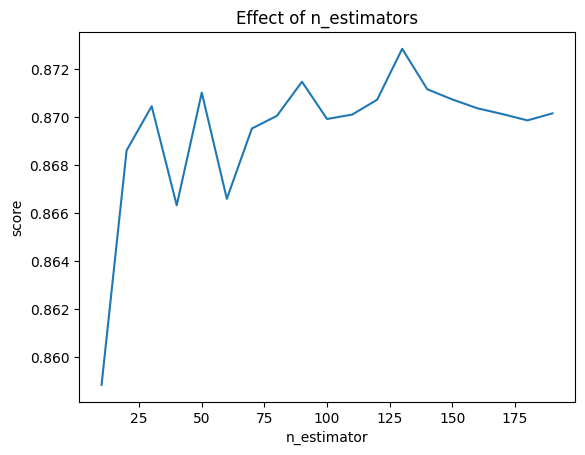

In [ ]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
!pip install pandas flask numpy scikit-learn requests category_encoders


In [ ]:
import requests as rq
import json as js
from time import sleep
import warnings
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')


class BestTimeToFertilize:
    __BASE_URL = "https://api.weatherbit.io/v2.0/forecast/daily?"
    __API_KEY = "c25646356f364ab9a3eb3155a93da0c9"

    def __init__(self, city_name='Bangalore', state_name='Karnataka', days=7):
        self.city_name = '+'.join(city_name.lower().strip().split())
        self.state_name = '+'.join(state_name.lower().strip().split())
        self.country_name = 'IN'
        self.days = days
        self.response = None
        self.response_code = None
        self.weather_data = list()

    def api_caller(self):
        try:
            complete_url = "{0}city={1}&state={2}&country={3}&key={4}&days={5}".format(
                self.__BASE_URL, self.city_name, self.state_name, self.country_name, self.__API_KEY, self.days)
            self.response = rq.get(complete_url)
            sleep(5)
            self.response_code = self.response.status_code
            return self.response_code
        except Exception as msg:
            print("api_caller():", msg)
            return -1

    def is_api_call_success(self):
        return self.response_code == 200

    def best_time_fertilize(self):
        json_obj = self.response.json()
        prolonged_precip = 0
        prolonged_prob = 0
        heavy_rain_2d = False
        heavy_rain_chance_2d = 0
        precip_2d = 0
        precip_chance_2d = 0

        for i in range(self.days):
            date = json_obj['data'][i]['datetime']
            temp = json_obj['data'][i]['temp']
            rh = json_obj['data'][i]['rh']
            precip = json_obj['data'][i]['precip']
            prob = json_obj['data'][i]['pop']
            w_code = json_obj['data'][i]['weather']['code']
            prolonged_precip += precip
            prolonged_prob += prob

            if i < 2:
                precip_2d += precip
                precip_chance_2d += prob
                if w_code in [202, 233, 502, 521, 522]:
                    heavy_rain_2d = True
                    heavy_rain_chance_2d += prob

            self.weather_data.append({
                "Date": date,
                "Temperature": temp,
                "Relative Humidity": rh,
                "Rainfall": precip,
                "Probability of Precipitation": prob
            })

        prolonged_prob //= self.days
        precip_chance_2d //= 2

        if heavy_rain_2d:
            print(f"Warning: Heavy Rain Chances within 2 days: {heavy_rain_chance_2d}%")
            return 'Heavy Rain Alert', heavy_rain_chance_2d

        elif prolonged_precip > 12.7 and prolonged_prob >= 50:
            print(f"Warning: Prolonged Rainfall Alert, Total rainfall: {prolonged_precip} mm")
            return 'Prolonged Rainfall Alert', prolonged_precip
        else:
            print(f"Precipitation over 2 days: {precip_2d} mm, Chance: {precip_chance_2d}%")
            return 'Precipitation Amount', precip_2d


class NPKEstimator:
    def __init__(self, data='Nutrient_recommendation.csv'):
        self.df = pd.read_csv(data, header=None)
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def renameCol(self):
        self.df.columns = ['Crop', 'Temperature', 'Humidity', 'Rainfall', 'Label_N', 'Label_P', 'Label_K']
        self.df.drop(self.df.index[:1], inplace=True)

    def cropMapper(self):
        mapping = dict()
        with open("mapped_crops.csv", "w") as fh:
            fh.write("Crops,Key\n")
            for i, crop in enumerate(np.unique(self.df[['Crop']]), 1):
                mapping[crop] = i
                fh.write(f"{crop},{i}\n")
            mapping['NA'] = np.nan
            fh.write("NA,nan")

        ordinal_cols_mapping = [{"col": "Crop", "mapping": mapping}]
        encoder = ce.OrdinalEncoder(cols='Crop', mapping=ordinal_cols_mapping, return_df=True)
        return mapping, encoder

    def estimator(self, crop, temp, humidity, rainfall, y_label):
        X = self.df.drop(['Label_N', 'Label_P', 'Label_K'], axis=1)
        y = self.df[y_label]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.20, random_state=42)

        mapping, encoder = self.cropMapper()
        self.X_train = encoder.fit_transform(self.X_train)
        self.X_test = encoder.transform(self.X_test)

        regressor = RandomForestRegressor(n_estimators=50, random_state=0)
        regressor.fit(self.X_train, self.y_train)

        query = [mapping[crop.strip().lower()], temp, humidity, rainfall]
        y_pred = regressor.predict([query])
        return y_pred[0]


# Example Usage
crop = input("Enter crop name: ").strip()
city = input("Enter city name: ").strip()
state = input("Enter state name: ").strip()

bttf = BestTimeToFertilize(city_name=city, state_name=state)
response_code = bttf.api_caller()

if bttf.is_api_call_success():
    alert_type, alert_message = bttf.best_time_fertilize()

    print("\n7-Day Weather Report:")
    for day in bttf.weather_data:
        print(f"Date: {day['Date']}, Temperature: {day['Temperature']}°C, "
              f"Relative Humidity: {day['Relative Humidity']}%, Rainfall: {day['Rainfall']} mm, "
              f"Probability of Precipitation: {day['Probability of Precipitation']}%")

    # Display alerts if any
    if alert_type == 'Warning':
        print(f"\n{alert_message}: {alert_message}")

    today_weather = bttf.weather_data[0]
    temp = today_weather['Temperature']
    humidity = today_weather['Relative Humidity']
    rainfall = today_weather['Rainfall']

    est = NPKEstimator()
    est.renameCol()

    npk = {'Label_N': 0, 'Label_P': 0, 'Label_K': 0}
    for y_label in ['Label_N', 'Label_P', 'Label_K']:
        npk[y_label] = est.estimator(crop, temp, humidity, rainfall, y_label)

    print(f"\nNutrition Recommendation for {crop}:")
    print(f"N: {npk['Label_N']}, P: {npk['Label_P']}, K: {npk['Label_K']}")
else:
    print("Error occurred while fetching weather data.")


Enter crop name: rice
Enter city name: karnataka
Enter state name: bangalore
Precipitation over 2 days: 0.0859375 mm, Chance: 10%

7-Day Weather Report:
Date: 2024-10-11, Temperature: 29.3°C, Relative Humidity: 78%, Rainfall: 0.0859375 mm, Probability of Precipitation: 20%
Date: 2024-10-12, Temperature: 29.6°C, Relative Humidity: 76%, Rainfall: 0 mm, Probability of Precipitation: 0%
Date: 2024-10-13, Temperature: 29.6°C, Relative Humidity: 75%, Rainfall: 0.015625 mm, Probability of Precipitation: 20%
Date: 2024-10-14, Temperature: 29.5°C, Relative Humidity: 75%, Rainfall: 0.11720276 mm, Probability of Precipitation: 20%
Date: 2024-10-15, Temperature: 29.8°C, Relative Humidity: 76%, Rainfall: 0.04686737 mm, Probability of Precipitation: 20%
Date: 2024-10-16, Temperature: 27.3°C, Relative Humidity: 75%, Rainfall: 0.0625 mm, Probability of Precipitation: 20%
Date: 2024-10-17, Temperature: 27°C, Relative Humidity: 82%, Rainfall: 8.875 mm, Probability of Precipitation: 75%

Nutrition Recomm